## Tool to select random 3D geological models from noddyverse 1M model suite
   
   
This notebook randomly selects and displays models from the 1 Million model suite, with the possibility to filter to specific deformation event sequences. 
   
For each model the magnetic response, the gravity response, the top surface, the north facing vertical section (looking from the south) and the west-facing vertical section (looking from the west) of the 4 x 4 x 4 km cube are displayed: 
   
![Example output](images/example.png)
   
The models consist of 20 m cubic voxels, and the history file used to define each model is provided as a link for each model. Windows software to read this history file is available at the <a href="http://tectonique.net/noddy">Noddy Site</a>, and the source code for a command line version of Noddy, as well as this notebook, is available from <a href="https://github.com/Loop3D/noddyverse">github</a> The 1M models themselves are stored at  <a href="https://cloudstor.aarnet.edu.au/plus/s/OUe6J9iWW1SnKjw">Cloudstor</a> as individual files and soon as a single tar.gz archive.

## Usage

To use this notebook modify the parameters in the first cell and then run all cells, with all outputs displayed at the bottom of the notebook. The code is exposed so that users can see how to parse the individual files. 
   
   
**his_filter** allows you to filter the models according to the event history, for example to only show histories whose last three events are a fold, then a fault, then a dyke use:
   
his_filter=['FOLD','FAULT','DYKE']
   
The full list of possible events (the first two, a base stratigraphy and a tilt are fixed) are:

- 'FAULT' 
- 'SHEAR-ZONE'
- 'FOLD' 
- 'TILT' 
- 'UNCONFORMITY' 
- 'DYKE' 
- 'PLUG'
- ''  means all event types will be retained, the default is [ '' , '' , '' ] meaning all event types are available. 
   
The same event labels can be used in all three positions
   
   
**display_number** defines how many randonly selected models to display

In [2]:
his_filter=['','',''] # FAULT SHEAR-ZONE FOLD TILT UNCONFORMITY DYKE PLUG default as loaded is to allow model sequences

display_number=10 # number of randomly selected models to display

In [3]:
import numpy as np
import matplotlib
from pandas import DataFrame
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from random import seed
import random
import time
import gzip
from urllib.request import urlopen
import pandas as pd
import io
import requests

%matplotlib inline

In [4]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    Thanks to https://gist.github.com/delestro/54d5a34676a8cef7477e
    
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np

    np.random.seed(seed=0)
    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap
cmap = rand_cmap(100, type='bright', first_color_black=False, last_color_black=False, verbose=False)

In [5]:
url='https://cloudstor.aarnet.edu.au/plus/s/57EnCSZ4Q1e4hdi/download'  

s=requests.get(url).content
models=pd.read_csv(io.StringIO(s.decode('utf-8')))


In [6]:
display(models)

,index,root,event03,event04,event05,event_all
0,33253,models/20-09-08-0/20-09-08-07-45-45-466895625,TILT,FOLD,FAULT,TILT FOLD FAULT
1,1343,models/20-09-10-2/20-09-10-20-18-32-996309781,SHEAR-ZONE,FOLD,PLUG,SHEAR-ZONE FOLD PLUG
2,2105,models/20-09-05-1/20-09-05-10-29-11-662663319,UNCONFORMITY,SHEAR-ZONE,UNCONFORMITY,UNCONFORMITY SHEAR-ZONE UNCONFORMITY
3,36981,models/20-09-12-0/20-09-12-08-43-06-988133936,FOLD,PLUG,PLUG,FOLD PLUG PLUG
4,14741,models/20-09-11-2/20-09-11-23-26-29-437516819,FAULT,SHEAR-ZONE,SHEAR-ZONE,FAULT SHEAR-ZONE SHEAR-ZONE
...,...,...,...,...,...,...
9995,14176,models/20-09-12-1/20-09-12-13-21-44-562267226,FAULT,SHEAR-ZONE,DYKE,FAULT SHEAR-ZONE DYKE
9996,8395,models/20-09-10-0/20-09-10-01-58-58-975734304,FOLD,FOLD,FOLD,FOLD FOLD FOLD
9997,11771,models/20-09-10-1/20-09-10-12-48-56-001978239,FOLD,DYKE,PLUG,FOLD DYKE PLUG
9998,14657,models/20-09-09-0/20-09-09-03-24-47-830787922,SHEAR-ZONE,SHEAR-ZONE,SHEAR-ZONE,SHEAR-ZONE SHEAR-ZONE SHEAR-ZONE


In [7]:

models2=models[models['event03'].str.contains(his_filter[0]) & models['event04'].str.contains(his_filter[1]) & models['event05'].str.contains(his_filter[2])] 
models2=models2.reset_index(drop=True)
display(models2)
model_number2=len(models2)


,index,root,event03,event04,event05,event_all
0,33253,models/20-09-08-0/20-09-08-07-45-45-466895625,TILT,FOLD,FAULT,TILT FOLD FAULT
1,1343,models/20-09-10-2/20-09-10-20-18-32-996309781,SHEAR-ZONE,FOLD,PLUG,SHEAR-ZONE FOLD PLUG
2,2105,models/20-09-05-1/20-09-05-10-29-11-662663319,UNCONFORMITY,SHEAR-ZONE,UNCONFORMITY,UNCONFORMITY SHEAR-ZONE UNCONFORMITY
3,36981,models/20-09-12-0/20-09-12-08-43-06-988133936,FOLD,PLUG,PLUG,FOLD PLUG PLUG
4,14741,models/20-09-11-2/20-09-11-23-26-29-437516819,FAULT,SHEAR-ZONE,SHEAR-ZONE,FAULT SHEAR-ZONE SHEAR-ZONE
...,...,...,...,...,...,...
9995,14176,models/20-09-12-1/20-09-12-13-21-44-562267226,FAULT,SHEAR-ZONE,DYKE,FAULT SHEAR-ZONE DYKE
9996,8395,models/20-09-10-0/20-09-10-01-58-58-975734304,FOLD,FOLD,FOLD,FOLD FOLD FOLD
9997,11771,models/20-09-10-1/20-09-10-12-48-56-001978239,FOLD,DYKE,PLUG,FOLD DYKE PLUG
9998,14657,models/20-09-09-0/20-09-09-03-24-47-830787922,SHEAR-ZONE,SHEAR-ZONE,SHEAR-ZONE,SHEAR-ZONE SHEAR-ZONE SHEAR-ZONE


Now get the models and display the mag, grav and map views

In [8]:
#seed random number generator
now = time.time()
seed(int(now))

url='https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files='

In [9]:
# download file, ungzip and stuff into numpy array
def get_gz_array(url,skiprows):
    my_gzip_stream = urlopen(url)
    my_stream = gzip.open(my_gzip_stream, 'r')
    return(np.loadtxt(my_stream,skiprows=skiprows))


5540 20-09-09-20-48-14-501614151 STRATIGRAPHY TILT DYKE FOLD DYKE
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-09-20-48-14-501614151.his.gz


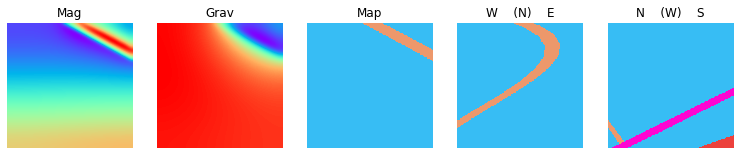

7662 20-09-09-21-35-48-299417635 STRATIGRAPHY TILT SHEAR-ZONE SHEAR-ZONE FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-09-21-35-48-299417635.his.gz


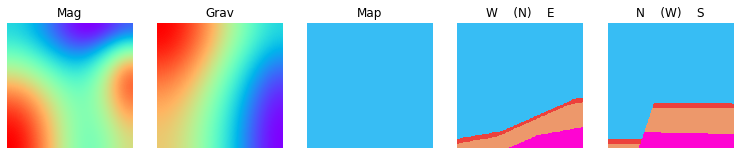

4279 20-09-09-16-11-25-663414917 STRATIGRAPHY TILT DYKE FOLD FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-09-16-11-25-663414917.his.gz


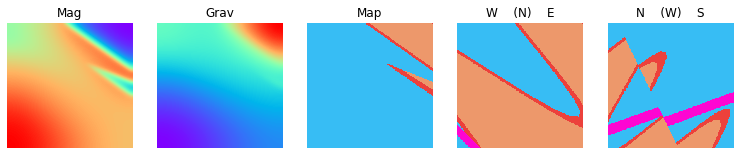

7937 20-09-11-01-35-22-537222718 STRATIGRAPHY TILT SHEAR-ZONE FAULT SHEAR-ZONE
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-11-01-35-22-537222718.his.gz


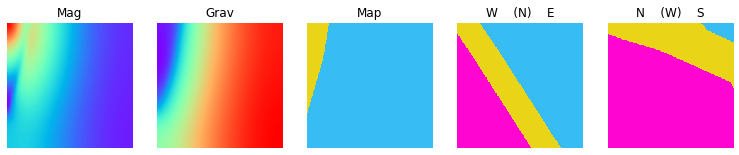

6753 20-09-09-23-07-14-837900190 STRATIGRAPHY TILT PLUG UNCONFORMITY SHEAR-ZONE
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-09-23-07-14-837900190.his.gz


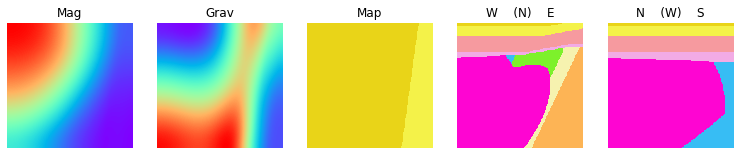

8997 20-09-11-19-33-20-423687464 STRATIGRAPHY TILT FAULT UNCONFORMITY FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-11-19-33-20-423687464.his.gz


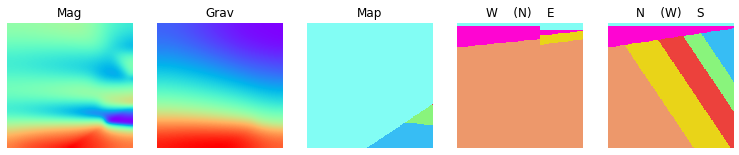

9888 20-09-04-22-35-52-076307841 STRATIGRAPHY TILT FAULT SHEAR-ZONE FOLD
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-04-22-35-52-076307841.his.gz


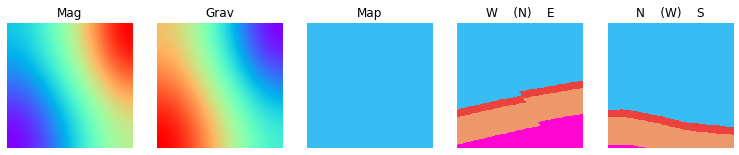

589 20-09-10-02-30-36-001702950 STRATIGRAPHY TILT TILT FAULT FAULT
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-10-02-30-36-001702950.his.gz


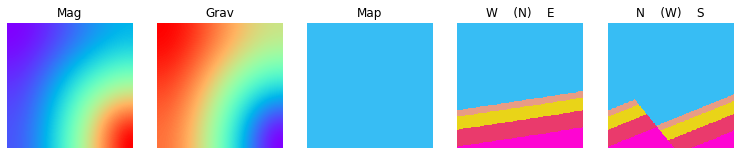

5928 20-09-12-22-59-49-102308116 STRATIGRAPHY TILT FOLD FAULT SHEAR-ZONE
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-12-22-59-49-102308116.his.gz


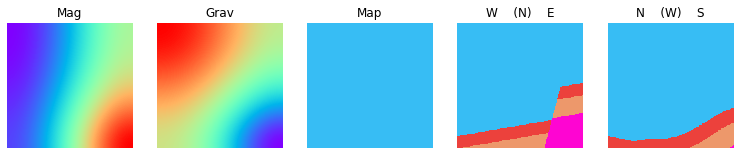

3445 20-09-12-02-49-46-616475403 STRATIGRAPHY TILT FOLD FOLD SHEAR-ZONE
Download .his file: https://cloudstor.aarnet.edu.au/plus/s/3GhvhCZRAU3fXdo/download?path=%2F&files=20-09-12-02-49-46-616475403.his.gz


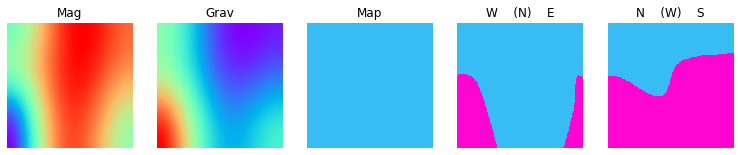

In [14]:
used=[]
for z in range (0,display_number):
    ran =random.randint(0,model_number2-1) 

    if(ran in used):
        z=z-1
        continue
    else:
        used.append(ran)
    file_split=models2.iloc[ran]['root'].split('/')  
    root=url+file_split[2]
    
    path=root+'.mag.gz'
    try:
        mag=get_gz_array(path,8)
    except:
        z=z-1
        continue
    path=root+'.grv.gz'
    grv=get_gz_array(path,skiprows=8)

    path=root+'.g12.gz'
    mod=get_gz_array(path,skiprows=0)

    mod2=mod.reshape((200,200,200))
    mod2=np.transpose(mod2,(0,2,1))
    mod2.shape
    vmin=np.amin(mod2)
    vmax=np.amax(mod2)
    show=True    
    print(ran,file_split[2],'STRATIGRAPHY TILT',models2.iloc[ran]['event_all'])

    if(show):
        fig, ax = plt.subplots(1,5,figsize=(13,13))
        ax[0].axis('off')
        ax[1].axis('off')
        ax[2].axis('off')
        ax[3].axis('off')
        ax[4].axis('off')
        ax[0].title.set_text('Mag' )
        ax[1].title.set_text('Grav')
        ax[2].title.set_text('Map')
        ax[3].title.set_text('W    (N)    E')
        ax[4].title.set_text('N    (W)    S')
        ax[0].imshow(mag,cmap='rainbow')
        ax[1].imshow(grv,cmap='rainbow')
        ax[2].imshow(mod2[0,:,:],cmap=cmap, interpolation="nearest",vmin=vmin,vmax=vmax)
        ax[3].imshow(mod2[:,0,:],cmap=cmap, interpolation="nearest",vmin=vmin,vmax=vmax)
        ax[4].imshow(mod2[:,:,0],cmap=cmap, interpolation="nearest",vmin=vmin,vmax=vmax)
        print("Download .his file:",root+".his.gz")
        plt.show()
    else:
        matplotlib.image.imsave('grv/model_'+models2.iloc[ran]['root']+'_grv.png', mag,cmap='rainbow')
        matplotlib.image.imsave('mag/model_'+models2.iloc[ran]['root']+'_mag.png', grv,cmap='rainbow')
        matplotlib.image.imsave('map/model_'+models2.iloc[ran]['root']+'_map.png', mod2[0,:,:],cmap=cmap,vmin=vmin,vmax=vmax)
        matplotlib.image.imsave('secWE/model_'+models2.iloc[ran]['root']+'_secWE.png', mod2[:,0,:],cmap=cmap,vmin=vmin,vmax=vmax)
        matplotlib.image.imsave('secNS/model_'+models2.iloc[ran]['root']+'_secNS.png', mod2[:,:,0],cmap=cmap,vmin=vmin,vmax=vmax)